In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice = merged_data_df["Mouse ID"].unique()
unique_mice
len(unique_mice)

249

In [4]:
merged_data_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data_df.loc[merged_data_df.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [80]:
duplicate_mouse = merged_data_df.loc[merged_data_df["Mouse ID"] == "g989", :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
updated_merged_data = merged_data_df.loc[merged_data_df['Mouse ID'] != "g989"]
updated_merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
unique_updated_data = updated_merged_data["Mouse ID"].unique()
len(unique_updated_data)

248

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
mean_mice = mean_mice.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
mean_mice = mean_mice.groupby(["Drug Regimen"]).mean()

median_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
median_mice = median_mice.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})
median_mice = median_mice.groupby(["Drug Regimen"]).median()

var_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
var_mice = var_mice.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'})
var_mice = var_mice.groupby(["Drug Regimen"]).var()

std_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
std_mice = std_mice.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Dev.'})
std_mice = std_mice.groupby(["Drug Regimen"]).std()

sem_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
sem_mice = sem_mice.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'})
sem_mice = sem_mice.groupby(["Drug Regimen"]).sem()

regimen_stats = pd.merge(mean_mice, median_mice, on=["Drug Regimen"])
regimen_stats = pd.merge(regimen_stats, var_mice, on=["Drug Regimen"])
regimen_stats = pd.merge(regimen_stats, std_mice, on=["Drug Regimen"])
regimen_stats = pd.merge(regimen_stats, sem_mice, on=["Drug Regimen"])
regimen_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

organized_merged_data = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean'],
                                                                      'Tumor Volume (mm3)':['median'],
                                                                      'Tumor Volume (mm3)':['var'],
                                                                      'Tumor Volume (mm3)':['std'],
                                                                      'Tumor Volume (mm3)':['sem']})
organized_merged_data

,Tumor Volume (mm3)
,sem
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955


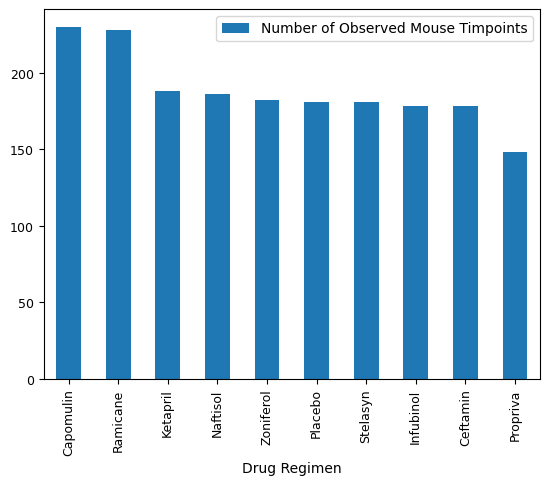

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = updated_merged_data["Drug Regimen"].value_counts()
timepoint_count = pd.DataFrame(total_rows)
timepoint_count = timepoint_count.reset_index()

timepoint_count = timepoint_count.rename(columns={"index": "Drug Regimen", "Drug Regimen": "Number of Observed Mouse Timpoints"})
                                         
bargraph = timepoint_count.plot.bar(x="Drug Regimen", y="Number of Observed Mouse Timpoints", fontsize='9')




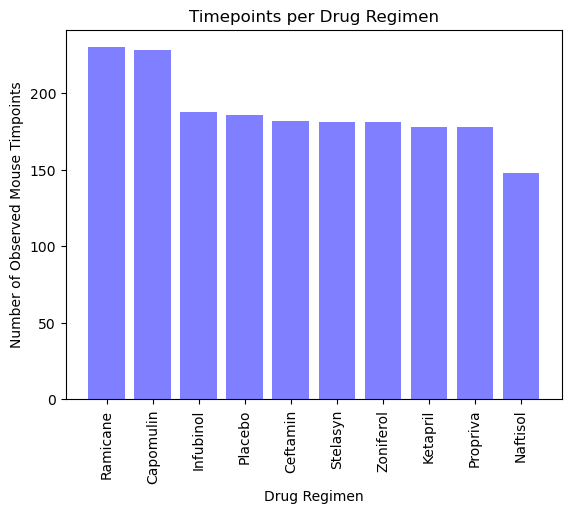

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = updated_merged_data["Drug Regimen"].unique()
y_axis = updated_merged_data["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

plt.xticks(rotation=90)
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timpoints")
plt.show()

In [ ]:
pie_plot = gender_count.plot.pie(y='Number of Each', figsize=(5, 5))

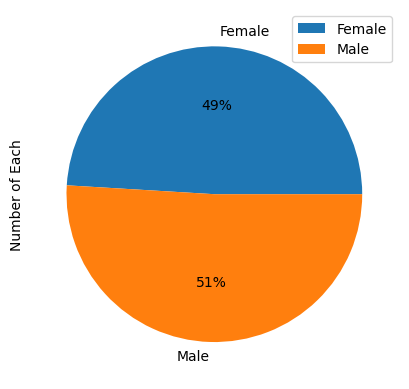

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_sex = updated_merged_data["Sex"].value_counts()
gender_count = pd.DataFrame(total_sex)
gender_count = gender_count.reset_index()

gender_count = gender_count.rename(columns={"index": "Sex", "Sex": "Number of Each"})

gender_count = gender_count.groupby(['Sex']).sum().plot(kind='pie', y='Number of Each', autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x1ef10c103d0>,
 [Text(-0.7433500820741923, -0.942035379102235, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.43362088120994546, -0.549520637809637, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

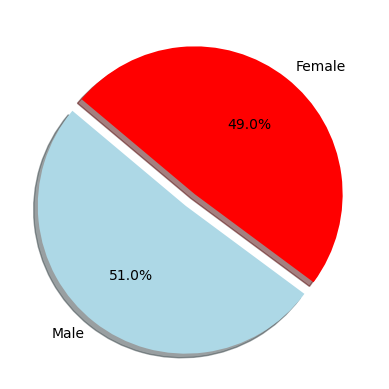

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = updated_merged_data["Sex"].value_counts()
colors = ["lightblue", "red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [96]:
capomulin_mice = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin", :]
timepoint_capomulin = capomulin_mice.groupby(["Mouse ID"]).max(["Tumor Volume (mm3)"]) 

timepoint_capomulin

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9,22,45,45.651331,2
b742,7,21,45,45.000000,0
f966,16,17,20,45.000000,0
g288,3,19,45,46.304003,1
g316,22,22,45,46.809225,2
i557,1,24,45,47.685963,1
i738,23,20,45,45.595685,2
j119,7,23,45,48.158209,1
j246,21,21,35,46.408361,1


In [86]:
capomulin_mice = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin", :]
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [87]:
ramicane_mice = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ramicane", :]
ramicane_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [88]:
infubinol_mice = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Infubinol", :]
infubinol_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [89]:
ceftamin_mice = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ceftamin", :]
ceftamin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
